In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import defaultdict
from matplotlib import gridspec
import matplotlib.patches as mpatches
from itertools import repeat
import glob
import os

### FIGURE 2
#### TCGA
- Fraction of discordant edges in conflict structures
- Number of SVs discovered by SQUID and D-SQUID
- Fraction of discordant edges resolved

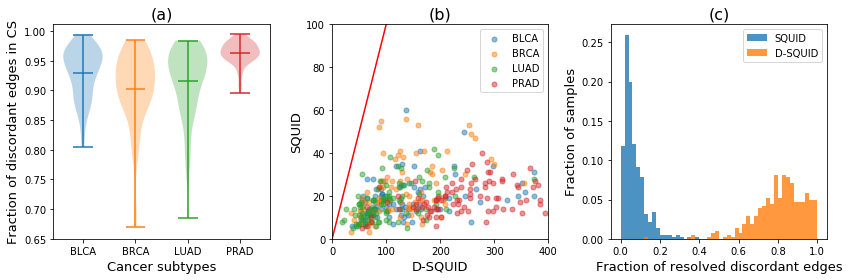

In [527]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from scipy.stats import pearsonr
from scipy.stats import spearmanr


fig, axes = plt.subplots(1,3)

df = pd.read_csv("TCGA_results/diploid_weights_all_short.txt", sep="\t")

tcga_conf = pd.read_csv("conflict_structures/tcga_num_disc_conf_allpaths.txt", sep="\t")

bl_df = df[df['# cancer']=='blca']
br_df = df[df['# cancer']=='brca']
lu_df = df[df['# cancer']=='luad']
pr_df = df[df['# cancer']=='prad']

bl_name = df[df['# cancer']=='blca']['barcode'].tolist()
br_name = df[df['# cancer']=='brca']['barcode'].tolist()
lu_name = df[df['# cancer']=='luad']['barcode'].tolist()
pr_name = df[df['# cancer']=='prad']['barcode'].tolist()

# bl_conf = tcga_conf[tcga_conf['cancer']=='blcashort']
# br_conf = tcga_conf[tcga_conf['cancer']=='brcashort']
# lu_conf = tcga_conf[tcga_conf['cancer']=='luadshort']
# pr_conf = tcga_conf[tcga_conf['cancer']=='pradshort']

# bl_conf = tcga_conf[tcga_conf['# cancer']=='blca']
# br_conf = tcga_conf[tcga_conf['# cancer']=='brca']
# lu_conf = tcga_conf[tcga_conf['# cancer']=='luad']
# pr_conf = tcga_conf[tcga_conf['# cancer']=='prad']

bl_conf = tcga_conf[tcga_conf['type']=='blca']
br_conf = tcga_conf[tcga_conf['type']=='brca']
lu_conf = tcga_conf[tcga_conf['type']=='luad']
pr_conf = tcga_conf[tcga_conf['type']=='prad']

labels=['BLCA', 'BRCA', 'LUAD', 'PRAD']
name_arr = [bl_name, br_name, lu_name, pr_name]
conf_arr = [bl_conf, br_conf, lu_conf, pr_conf]
num_arr = []
squid_arr = []

for s, d in enumerate([bl_df, br_df, lu_df, pr_df]):

    counts = d.groupby(by=['barcode','isnew']).count()
    haploid = [0] * (len(counts.index)//2)
    diploid = [0] * (len(counts.index)//2)


    counter = 0
    for i in counts.index:
        if i[1] == False:
            haploid[counter]+=counts.loc[i]['chrom1']
            diploid[counter]+=counts.loc[i]['chrom2']
        if i[1] == True:
            diploid[counter] += counts.loc[i]['chrom2']
            counter+=1

    haploid_score = df[df['isnew']==False]['score']
    diploid_score = df[df['isnew']==True]['score']
    
    diploid = sorted(zip(diploid, name_arr[s]), key=lambda x: x[1] )
    num_arr.append([d[0] for d in diploid])
    squid_arr.append(haploid)

    axes[1].scatter([d[0] for d in diploid],haploid, s = 25, label=labels[s], alpha=0.5)

# axes[1].violinplot([bl_conf['num'].tolist(),br_conf['num'].tolist(),la_conf['num'].tolist(),pr_conf['num'].tolist()], positions=np.arange(0,4), showmeans=True)
# axes[1].violinplot(num_arr, positions= showmeans=True)

axes[1].legend(loc='best')
axes[1].set_ylim(0,100)
axes[1].set_xlim(0,400)
axes[1].plot(np.arange(0,400), np.arange(0,400), 'red')
axes[1].set_ylabel("SQUID", fontsize=13)
axes[1].set_xlabel("D-SQUID", fontsize=13)
axes[1].set_title("(b)", fontsize=16)

for i in range(4):
    axes[0].violinplot(conf_arr[i]['fraction'].tolist(), positions=[i/1.5], showmeans=True)

axes[0].set_title("(a)", fontsize=16)
axes[0].set_xticks(np.arange(4)/1.5)
# axes[0].set_ylim(0,800)
axes[0].set_yticks(np.arange(65,101,5)/100)
axes[0].set_xlabel("Cancer subtypes", fontsize=13)
axes[0].set_ylabel("Fraction of discordant edges in CS", fontsize=13)
axes[0].set_xticklabels(labels)
    
    
    
    
df = pd.read_csv("tcga_fraction.txt", sep="\t")
# bl_df = df[df['sample'].str.match('blca*')]
# br_df = df[df['sample'].str.match('brca*')]
# lu_df = df[df['sample'].str.match('luad*')]
# pr_df = df[df['sample'].str.match('prad*')]
weights_s = np.ones_like(df['squid_frac_conf'])/float(len(df['squid_frac_conf']))
weights_d = np.ones_like(df['diploid_frac_conf'])/float(len(df['diploid_frac_conf']))
a = axes[2].hist(df['squid_frac_conf'],bins=np.arange(0,101,2)/100,label="SQUID",color='C0',alpha=0.8,weights=weights_s)
a = axes[2].hist(df['diploid_frac_conf'],bins=np.arange(0,101,2)/100,label="D-SQUID",color='C1',alpha=0.8,weights=weights_d)
axes[2].legend()
    
    
# for i in range(4):
#     axes[2].scatter([i-j for i,j in zip(num_arr[i],squid_arr[i])], conf_arr[i]['fraction'].tolist()[:len(num_arr[i])], s=25, label=labels[i], alpha=0.5)
#     print(spearmanr(num_arr[i], conf_arr[i]['fraction'].tolist()[:len(num_arr[i])]))

axes[2].set_title("(c)", fontsize=16)
axes[2].legend(loc='best')
# axes[2].set_xlim(0,1)
# axes[2].set_ylim(0,300)
# axes[2].set_yticks(np.arange(0,0.26))
# axes[2].plot(np.arange(0,600), np.arange(0,600), 'red')
axes[2].set_ylabel("Fraction of samples", fontsize=13)
axes[2].set_xlabel("Fraction of resolved discordant edges", fontsize=13)

# a = axes[1].hist(haploid_score, bins=np.arange(1,40,1),density=True, label="SQUID")
# b = axes[1].hist(diploid_score, bins=np.arange(1,40,1),alpha=0.7, density=True, label="D-SQUID novel")
# axes[1].set_ylabel("Frequency", fontsize=13)
# axes[1].set_xlabel("Number of concordant read alignments", fontsize=13)
# axes[1].set_title("(b)", fontsize=15)
# axes[1].legend()

fig.tight_layout(w_pad=-6)
fig.set_size_inches(16,4)
fig.savefig("TCGAresults.pdf", bbox_inches='tight',dpi=500)

### FIGURE 3
#### HCC cell line
- \# TSV predicted
- \# known TSV predicted
- fraction of discordant edges in conflict structures

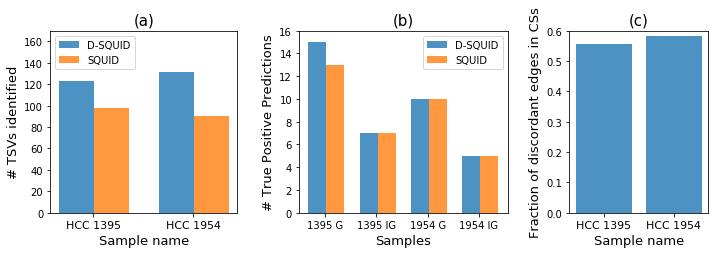

In [57]:
# data entry
diploid_total = np.array([123,131])#,250])
squid_total = np.array([98,90])#,178])
diploid_gene = np.array([15,7])#,20])
squid_gene = np.array([13,7])#,18])
diploid_nongene = np.array([10,5])#,18])
squid_nongene = np.array([10,5])#,17])

diploid = np.array([123,131])#,250])#,15,7,10,5])
squid = np.array([98,90])#,178])#,13,7,10,5])

diploid_hit = np.array([15,7,10,5])#, 20,18])
squid_hit = np.array([13,7,10,5])#,18,17])

#plot
files = np.array(["HCC 1395", "HCC 1954"])#, "Merged"])
fig,axes = plt.subplots(1,3, gridspec_kw={'width_ratios': [3.5,3.9,2.6]})
index = np.arange(len(diploid))
opacity = 0.8
bar_width=0.35

rects1 =axes[0].bar(index, diploid, bar_width,
alpha=opacity,
color='C0',
label='D-SQUID', tick_label=files)
 
rects2 =axes[0].bar(index + bar_width, squid, bar_width,
alpha=opacity,
color='C1',
label='SQUID', tick_label=files)
# axes[0].set_xticks(index+0.5*bar_width, files)
axes[0].set_title("(a)",fontsize=15)

axes[0].legend()

index = np.arange(len(diploid_hit))
opacity = 0.8
bar_width=0.35

labels= ["1395 G","1395 IG","1954 G","1954 IG"]#,"Merged_G","Merged_IG"]

rects1 = axes[1].bar(index, diploid_hit, bar_width,
alpha=opacity,
color='C0',
label='D-SQUID',
tick_label=labels)
 
rects2 = axes[1].bar(index + bar_width, squid_hit, bar_width,
alpha=opacity,
color='C1',
label='SQUID',
tick_label=labels)

# axes[1].xticks(index+0.5*bar_width, ["1395_gene","1395_nongene","1954_gene","1954_nongene","Merged_gene","Merged_nongene"],rotation=20)
axes[1].set_title("(b)",fontsize=15)
axes[0].set_ylim(0,170)
axes[0].legend(loc='upper left')
axes[0].set_xticks(np.arange(0, len(diploid))+0.17)
axes[0].set_xticklabels(["HCC 1395", "HCC 1954"], fontsize=11)#, "HCC merged"])
axes[0].set_xlabel("Sample name", fontsize=13)

axes[1].set_xticks(np.arange(0, len(diploid_hit))+0.15)
axes[1].set_ylim(0,16)
# axes[1].set_xticklabels(labels,rotation=90, fontsize=11)
axes[1].set_xlabel("Samples",fontsize=13)
axes[1].set_ylabel("# true positive predictions")
# 
axes[1].legend()
axes[0].set_ylabel("# TSVs identified",fontsize=13)
axes[1].set_ylabel("# True Positive Predictions",fontsize=13)

# hap_num_disc = [53, 21]
hap_num_disc = [66/119, 93/160]
# hap_num_disc = [66, 93]
axes[2].bar([1,2],hap_num_disc, alpha=0.8)
axes[2].set_ylabel("Fraction of discordant edges in CSs", fontsize=13)
axes[2].set_xticks([1,2])
axes[2].set_ylim(0,0.6)
# axes[2].set_yticks(np.arange(0,101,20))#/100)
axes[2].set_xticklabels(["HCC 1395", "HCC 1954"], fontsize=11)#, "HCC merged"])
axes[2].set_title("(c)", fontsize=15)
axes[2].set_xlabel("Sample name", fontsize=13)



fig.tight_layout(w_pad=-1)
fig.set_size_inches(11,3.4)
fig.savefig("HCC_2.pdf", dpi=500, bbox_size_inches='tight')

### FIGURE 4
#### Approximation performance

In [3]:
files = os.listdir("approx_compare")

In [4]:
def read_runtime(file):
    time_dict = defaultdict(dict)
    obj_dict = defaultdict(dict)
    frac_dict = defaultdict(dict)
    for line in open("approx_compare/"+file):
        name, obj, frac, time = line.rstrip("\n").split(" ")
        if frac=="":
            frac = 1
        prefix = "_".join(name.split("_")[:-1])
        op = name.split("_")[-1]
        time_dict[prefix][op]=float(time)
        obj_dict[prefix][op]=float(obj)
        frac_dict[prefix][op]=float(frac)
    return time_dict, obj_dict, frac_dict

In [5]:
file2="tcga_obj_frac_runtime.txt"
file="sim_obj_frac_runtime.txt"
file2="tcga_rerun"
# file2="sim_hap_obj_frac_runtime.txt"
time_dict_sim, obj_dict_sim, frac_dict_sim = read_runtime(file)
time_dict_hcc, obj_dict_hcc, frac_dict_hcc = read_runtime(file2)

In [6]:
keys = [k for k in list(time_dict_sim.keys()) if 'D' in time_dict_sim[k] and 'A2' in time_dict_sim[k]]
# x = [time_dict_sim[k]['I'] / time_dict_sim[k]['A2'] for k in keys]
# y_f = [frac_dict_sim[k]['I'] / frac_dict_sim[k]['A2'] for k in keys]
# y_o = [obj_dict_sim[k]['I'] / obj_dict_sim[k]['A2'] for k in keys]


# x2 = [time_dict_sim[k]['I'] / time_dict_sim[k]['A'] for k in keys]
# y2_f = [frac_dict_sim[k]['I'] / frac_dict_sim[k]['A'] for k in keys]
# y2_o = [obj_dict_sim[k]['I'] / obj_dict_sim[k]['A'] for k in keys]


x3 = [time_dict_sim[k]['D'] / time_dict_sim[k]['A2'] for k in keys]
y3_f = [frac_dict_sim[k]['D'] / frac_dict_sim[k]['A2'] for k in keys]
y3_o = [obj_dict_sim[k]['D'] / obj_dict_sim[k]['A2'] for k in keys]


x4 = [time_dict_sim[k]['D'] / time_dict_sim[k]['A'] for k in keys]
y4_f = [frac_dict_sim[k]['D'] / frac_dict_sim[k]['A'] for k in keys]
y4_o = [obj_dict_sim[k]['D'] / obj_dict_sim[k]['A'] for k in keys]

keys = [k for k in list(time_dict_hcc.keys()) if 'D' in time_dict_hcc[k] and 'A2' in time_dict_hcc[k]]
# x_hcc = [time_dict_hcc[k]['I'] / time_dict_hcc[k]['A2'] for k in keys]
# y_f_hcc = [frac_dict_hcc[k]['I'] / frac_dict_hcc[k]['A2'] for k in keys]
# y_o_hcc = [obj_dict_hcc[k]['I'] / obj_dict_hcc[k]['A2'] for k in keys]


# x2_hcc = [time_dict_hcc[k]['I'] / time_dict_hcc[k]['A'] for k in keys]
# y2_f_hcc = [frac_dict_hcc[k]['I'] / frac_dict_hcc[k]['A'] for k in keys]
# y2_o_hcc = [obj_dict_hcc[k]['I'] / obj_dict_hcc[k]['A'] for k in keys]


x3_hcc = [time_dict_hcc[k]['D'] / time_dict_hcc[k]['A2'] for k in keys]
y3_f_hcc = [frac_dict_hcc[k]['D'] / frac_dict_hcc[k]['A2'] for k in keys]
y3_o_hcc = [obj_dict_hcc[k]['D'] / obj_dict_hcc[k]['A2'] for k in keys]


x4_hcc = [time_dict_hcc[k]['D'] / time_dict_hcc[k]['A'] for k in keys]
y4_f_hcc = [frac_dict_hcc[k]['D'] / frac_dict_hcc[k]['A'] for k in keys]
y4_o_hcc = [obj_dict_hcc[k]['D'] / obj_dict_hcc[k]['A'] for k in keys]

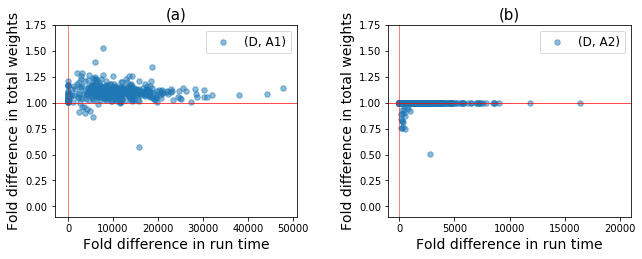

In [58]:
fig,axes = plt.subplots(1,2)
axes[0].scatter(x4_hcc, y4_o_hcc,alpha=0.5,s=30,label="(D, A1)")
axes[1].scatter(x3_hcc, y3_o_hcc,alpha=0.5,s=30,label="(D, A2)")

title=['(a)','(b)','(c)','(d)']
for i in range(2):
    axes[i].set_ylim(-0.1,1.75)
#     axes[i].set_yticklabels(np.arange(0,20,2)/10)
    axes[i].legend(fontsize=12)
    axes[i].set_title(title[i],fontsize=15)
    axes[i].set_ylabel("Fold difference in total weights", fontsize=14)
    axes[i].set_xlabel(r"Fold difference in run time" , fontsize=14) # ($\times 10^4$)
    axes[i].plot([1,1],[-1,1000000], color="red",linewidth=0.5)
    axes[i].plot([-10000,100000],[1,1], color="red",linewidth=0.7)


axes[0].set_xlim(-3000,51000)
axes[0].set_xticks(np.arange(0,51000,10000))
# axes[0].set_xticklabels(np.arange(0,70,20)/10)
axes[1].set_xlim(-1000,21000)
axes[1].set_xticks(np.arange(0,21000,5000))
# axes[1].set_xticklabels(np.arange(0,21,5)/10)

# axes[0].set_xticklabels([r"${:2.0f} \times 10^{{ {:2d} }}$".format(i,4) for i in np.arange(0,8)])
# axes[1].set_xticklabels([r"${} \times 10^{{ {:2d} }}$".format(float(i),4) for i in np.arange(0,21,5)/10])
fig.tight_layout(w_pad=-1)
fig.set_size_inches(10,3.6)
fig.savefig("Approx_compare_tcga.pdf", dpi=500, bbox_size_inches='tight')